In [2]:
import os
import re
import string

import numpy as np
import pandas as pd 
pd.set_option('display.max_columns', None)

import seaborn as sns

import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
%matplotlib inline

In [3]:
print("# File Size:")
for f in os.listdir('archive/'):
    if 'csv' in f:
        print(f.ljust(30) + str(round(os.path.getsize('archive/' + f) / 1000000, 2)) + 'MB')

# File Size:
app_events.csv                1037.27MB
app_labels.csv                11.19MB
brand_translate.csv           0.0MB
events.csv                    195.43MB
gender_age_test.csv           2.28MB
gender_age_train.csv          2.37MB
label_categories.csv          0.02MB
phone_brand_device_model.csv  6.72MB


In [5]:
device = pd.read_csv("archive/phone_brand_device_model.csv")
events = pd.read_csv("archive/events.csv")
app_events = pd.read_csv("archive/app_events.csv")
app_labels = pd.read_csv("archive/app_labels.csv")
label_categories = pd.read_csv("archive/label_categories.csv")
gender_age_train = pd.read_csv("archive/gender_age_train.csv")
gender_age_test = pd.read_csv("archive/gender_age_test.csv")

## DEVICE

In [8]:
device.head(1)

,device_id,phone_brand,device_model
0,-8890648629457979026,小米,红米


In [6]:
device.shape

(187245, 3)

In [9]:
device.isnull().sum()

device_id       0
phone_brand     0
device_model    0
dtype: int64

In [6]:
list(device.phone_brand)

['小米',
 '小米',
 '三星',
 'SUGAR',
 '三星',
 '华为',
 '小米',
 '华为',
 '小米',
 'vivo',
 '三星',
 '小米',
 '三星',
 '三星',
 '小米',
 '小米',
 '华为',
 'vivo',
 '小米',
 '魅族',
 '三星',
 '小米',
 '小米',
 'vivo',
 '三星',
 '小米',
 '酷派',
 '天语',
 'OPPO',
 '三星',
 '中兴',
 '酷派',
 'vivo',
 '三星',
 '小米',
 '金立',
 '联想',
 '三星',
 '三星',
 '小米',
 '联想',
 '华为',
 '小米',
 '小米',
 '三星',
 '三星',
 '小米',
 '海信',
 '三星',
 '小米',
 '索尼',
 'vivo',
 '联想',
 '酷派',
 '三星',
 'LG',
 '小米',
 '小米',
 'vivo',
 'vivo',
 '华为',
 'vivo',
 '酷派',
 '三星',
 '三星',
 '小米',
 'vivo',
 'OPPO',
 'vivo',
 '小米',
 '小米',
 '三星',
 '索尼',
 '小米',
 'OPPO',
 'OPPO',
 '华为',
 '小米',
 '小米',
 '酷派',
 '华为',
 '三星',
 '三星',
 '华为',
 '三星',
 '联想',
 '小米',
 '三星',
 '华为',
 '华为',
 '华为',
 '三星',
 '华为',
 '华为',
 '金立',
 'HTC',
 '联想',
 'HTC',
 'vivo',
 '三星',
 '三星',
 '三星',
 '小米',
 '三星',
 '小米',
 '小米',
 '小米',
 '小米',
 '华为',
 '酷比',
 '三星',
 '小米',
 '华为',
 '三星',
 '小米',
 '三星',
 '联想',
 '魅族',
 '小米',
 '小米',
 '三星',
 '联想',
 '酷派',
 '小米',
 '酷派',
 '小米',
 'vivo',
 '魅族',
 '三星',
 '华为',
 '三星',
 '小米',
 '三星',
 '三星',
 '联想',
 '华为',
 '小米',
 '联想

## EVENTS

In [11]:
events = pd.read_csv("archive/events.csv")

In [4]:
events.head(1)

,event_id,device_id,timestamp,longitude,latitude
0,1,29182687948017175,2016-05-01 00:55:25,121.38,31.24


In [10]:
events.shape

(3252950, 5)

In [11]:
events.isnull().sum()

event_id     0
device_id    0
timestamp    0
longitude    0
latitude     0
dtype: int64

In [14]:
len(events)

3252950

In [60]:
events.timestamp = pd.to_datetime(events.timestamp)

In [61]:
events.head(1)

,event_id,device_id,timestamp,longitude,latitude
0,1,29182687948017175,2016-05-01 00:55:25,121.38,31.24


In [62]:
events.sort_values('timestamp', inplace=True)

In [63]:
events.head()

,event_id,device_id,timestamp,longitude,latitude
975953,975954,1284250737810407640,2016-04-30 23:52:24,0.00,0.00
291990,291991,-5815555854982631278,2016-04-30 23:52:26,0.00,0.00
2404699,2404700,1779631023439405334,2016-04-30 23:52:26,114.25,30.58
1267792,1267793,9032751590435469715,2016-04-30 23:52:27,114.76,38.20
421244,421245,-1945835327787113275,2016-04-30 23:52:42,104.67,23.16


In [64]:
events.set_index('timestamp', inplace=True)

In [66]:
events["year"] = events.index.year

In [67]:
events["month"] = events.index.month

In [68]:
events["day"] = events.index.day

In [69]:
events["hour"] = events.index.hour

In [73]:
events.head()

,event_id,device_id,longitude,latitude,year,month,day,hour
timestamp,,,,,,,,
2016-04-30 23:52:24,975954,1284250737810407640,0.00,0.00,2016,4,30,23
2016-04-30 23:52:26,291991,-5815555854982631278,0.00,0.00,2016,4,30,23
2016-04-30 23:52:26,2404700,1779631023439405334,114.25,30.58,2016,4,30,23
2016-04-30 23:52:27,1267793,9032751590435469715,114.76,38.20,2016,4,30,23
2016-04-30 23:52:42,421245,-1945835327787113275,104.67,23.16,2016,4,30,23


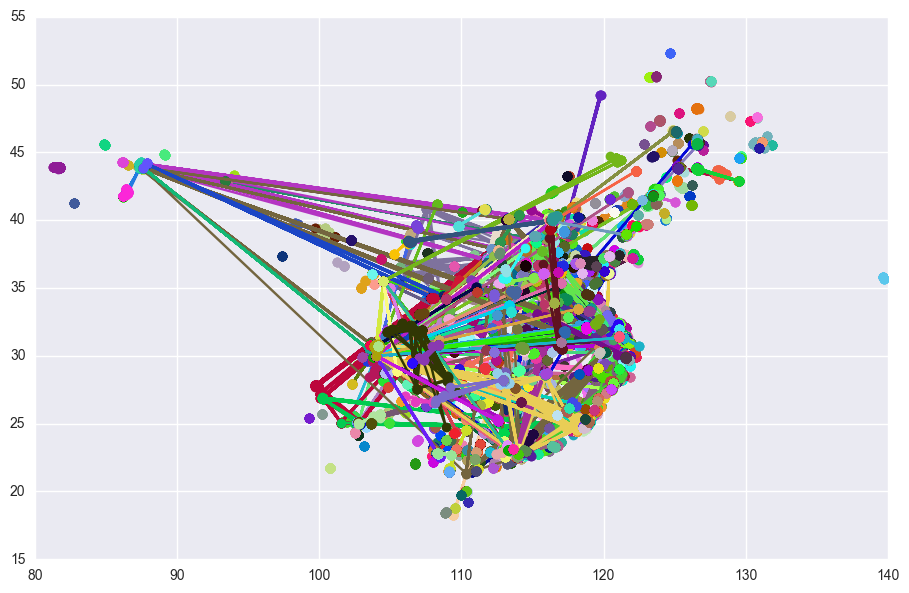

In [74]:
x = pd.read_csv('archive/events.csv')
gd = x.groupby('device_id')


i = 2000
thresh = 10

plt.figure(figsize=(11,7)) 
for g in gd:
    g = g[1]
    g = g.loc[g.latitude > 18]
    g = g.loc[g.longitude > 80]
    if g.shape[0] > thresh:
        lon = g['longitude']
        lat = g['latitude']
        plt.plot(lon, lat, '-o', color=np.random.rand(3).tolist())
        i -= 1
    if i < 0:
        break
    
plt.show()

## APP EVENTS

In [24]:
app_events.head(1)

,event_id,app_id,is_installed,is_active
0,2,5927333115845830913,1,1


In [12]:
app_events.isnull().sum()

event_id        0
app_id          0
is_installed    0
is_active       0
dtype: int64

In [13]:
app_events.shape

(32473067, 4)

In [25]:
app_events.is_active.value_counts()/len(app_events)*100

0    60.789056
1    39.210944
Name: is_active, dtype: float64

In [37]:
active = app_events[app_events.is_active == 1]

### 12,732,996 Active Events

In [38]:
active.shape

(12732996, 4)

## APP LABELS

In [11]:
app_labels.head(1)

,app_id,label_id
0,7324884708820027918,251


In [14]:
app_labels.isnull().sum()

app_id      0
label_id    0
dtype: int64

In [15]:
app_labels.shape

(459943, 2)

In [26]:
len(app_labels)

459943

## LABEL CATEGORIES

In [20]:
label_categories.shape

(930, 2)

In [17]:
label_categories.head(2)

,label_id,category
0,1,NaN
1,2,game-game type


In [19]:
label_categories.isnull().sum()

label_id    0
category    3
dtype: int64

## GENDER AGE TRAINING

In [40]:
gender_age_train.head(1)

,device_id,gender,age,group
0,-8076087639492063270,M,35,M32-38


In [27]:
gender_age_train[gender_age_train['age'] <= 30]

,device_id,gender,age,group
3,-4938849341048082022,M,30,M29-31
4,245133531816851882,M,30,M29-31
5,-1297074871525174196,F,24,F24-26
12,2478205222798310601,F,28,F27-28
15,1508636020748379883,F,28,F27-28
21,8026504930081700361,M,25,M23-26
22,1118970699362079126,M,24,M23-26
23,-7271319853104672050,M,27,M27-28
24,-9216966316587614491,M,29,M29-31
32,7106922851105968241,M,22,M22-


In [21]:
gender_age_train.shape

(74645, 4)

In [22]:
gender_age_train.isnull().sum()

device_id    0
gender       0
age          0
group        0
dtype: int64

M    47904
F    26741
Name: gender, dtype: int64


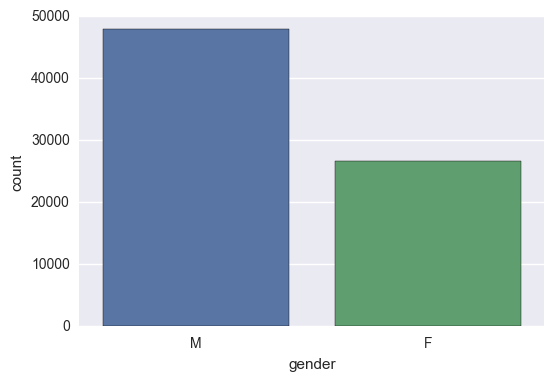

In [42]:
print(gender_age_train.gender.value_counts())
ax = sns.countplot(x="gender", data=gender_age_train)

In [55]:
print("Percentage of Male vs. Female")
gender_age_train.gender.value_counts()/len(gender_age_train)*100

Percentage of Male vs. Female


M    64.175765
F    35.824235
Name: gender, dtype: float64

In [57]:
print("Distribution by Group")
gender_age_train.group.value_counts().sort_values()/len(gender_age_train)*100

Distribution by Group


F27-28     4.177105
F24-26     5.613236
F43+       5.618595
F29-32     6.200013
F23-       6.765356
M27-28     7.294527
F33-42     7.449930
M29-31     9.791681
M22-      10.031482
M39+      11.495747
M32-38    12.694755
M23-26    12.867573
Name: group, dtype: float64

In [24]:
gender_age_train.group.value_counts().sort_values()

F27-28    3118
F24-26    4190
F43+      4194
F29-32    4628
F23-      5050
M27-28    5445
F33-42    5561
M29-31    7309
M22-      7488
M39+      8581
M32-38    9476
M23-26    9605
Name: group, dtype: int64

/Users/AntonioPasciuto/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


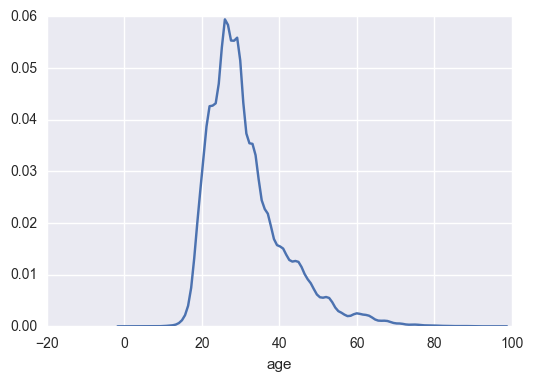

In [46]:
sns.distplot(gender_age_train.age, hist=False);
#here age is not normally distributaed between 20 - 40 are the dominate age 

/Users/AntonioPasciuto/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


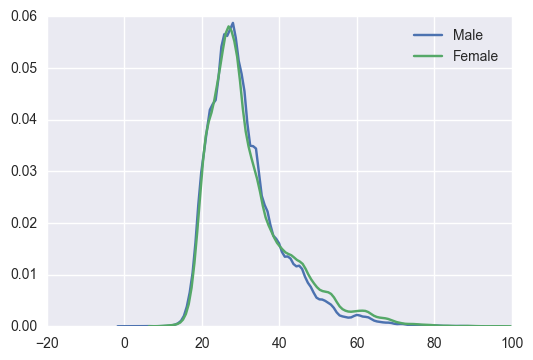

In [51]:
sns.kdeplot(gender_age_train.age[gender_age_train.gender=="M"], label="Male")
sns.kdeplot(gender_age_train.age[gender_age_train.gender=="F"],  label="Female")
plt.legend();

Men


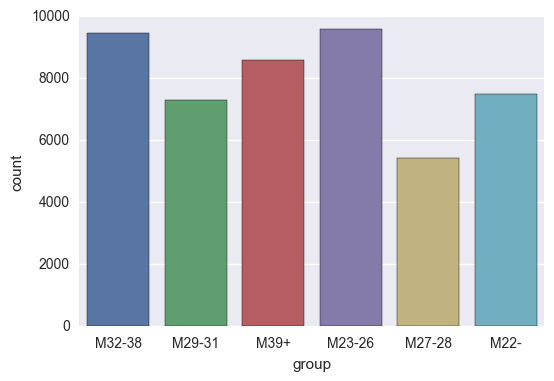

In [50]:
print("Men")
ax = sns.countplot(x="group", data=gender_age_train[gender_age_train.gender=="M"])

Women


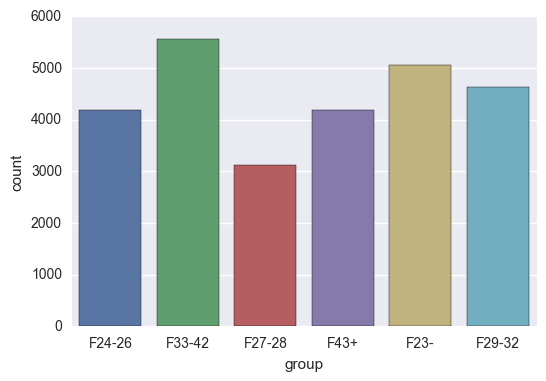

In [53]:
print("Women")
ax = sns.countplot(x="group", data=gender_age_train[gender_age_train.gender=="F"])